# Data dictionary

# [Link to dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Variable Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">age</td>
    <td class="tg-7zrl">Edad del asegurado</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">sex</td>
    <td class="tg-7zrl">Género</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">bmi</td>
    <td class="tg-7zrl">Indice de masa corporal</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">children</td>
    <td class="tg-7zrl">Número de hijos</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">smoker</td>
    <td class="tg-7zrl">Indicador si fuma</td>
    <td class="tg-7zrl">Boolean</td>
  </tr>
  <tr>
    <td class="tg-7zrl">region</td>
    <td class="tg-7zrl">Región donde vive el asegurado</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">charges</td>
    <td class="tg-7zrl">Prima del seguro</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
</tbody></table>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
# looking for missing values
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # Ensure PCA is imported
import numpy as np # Ensure numpy is imported for general array operations

# Import necessary PyTorch libraries (if you are continuing with the model part)
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import numpy as np


# Load Dataset

In [3]:
# reading data
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Split Dataset

In [4]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (1070, 7)
test shape: (268, 7)


# Data Visualization

In [5]:
train.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


In [6]:
train.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


## Check missing values

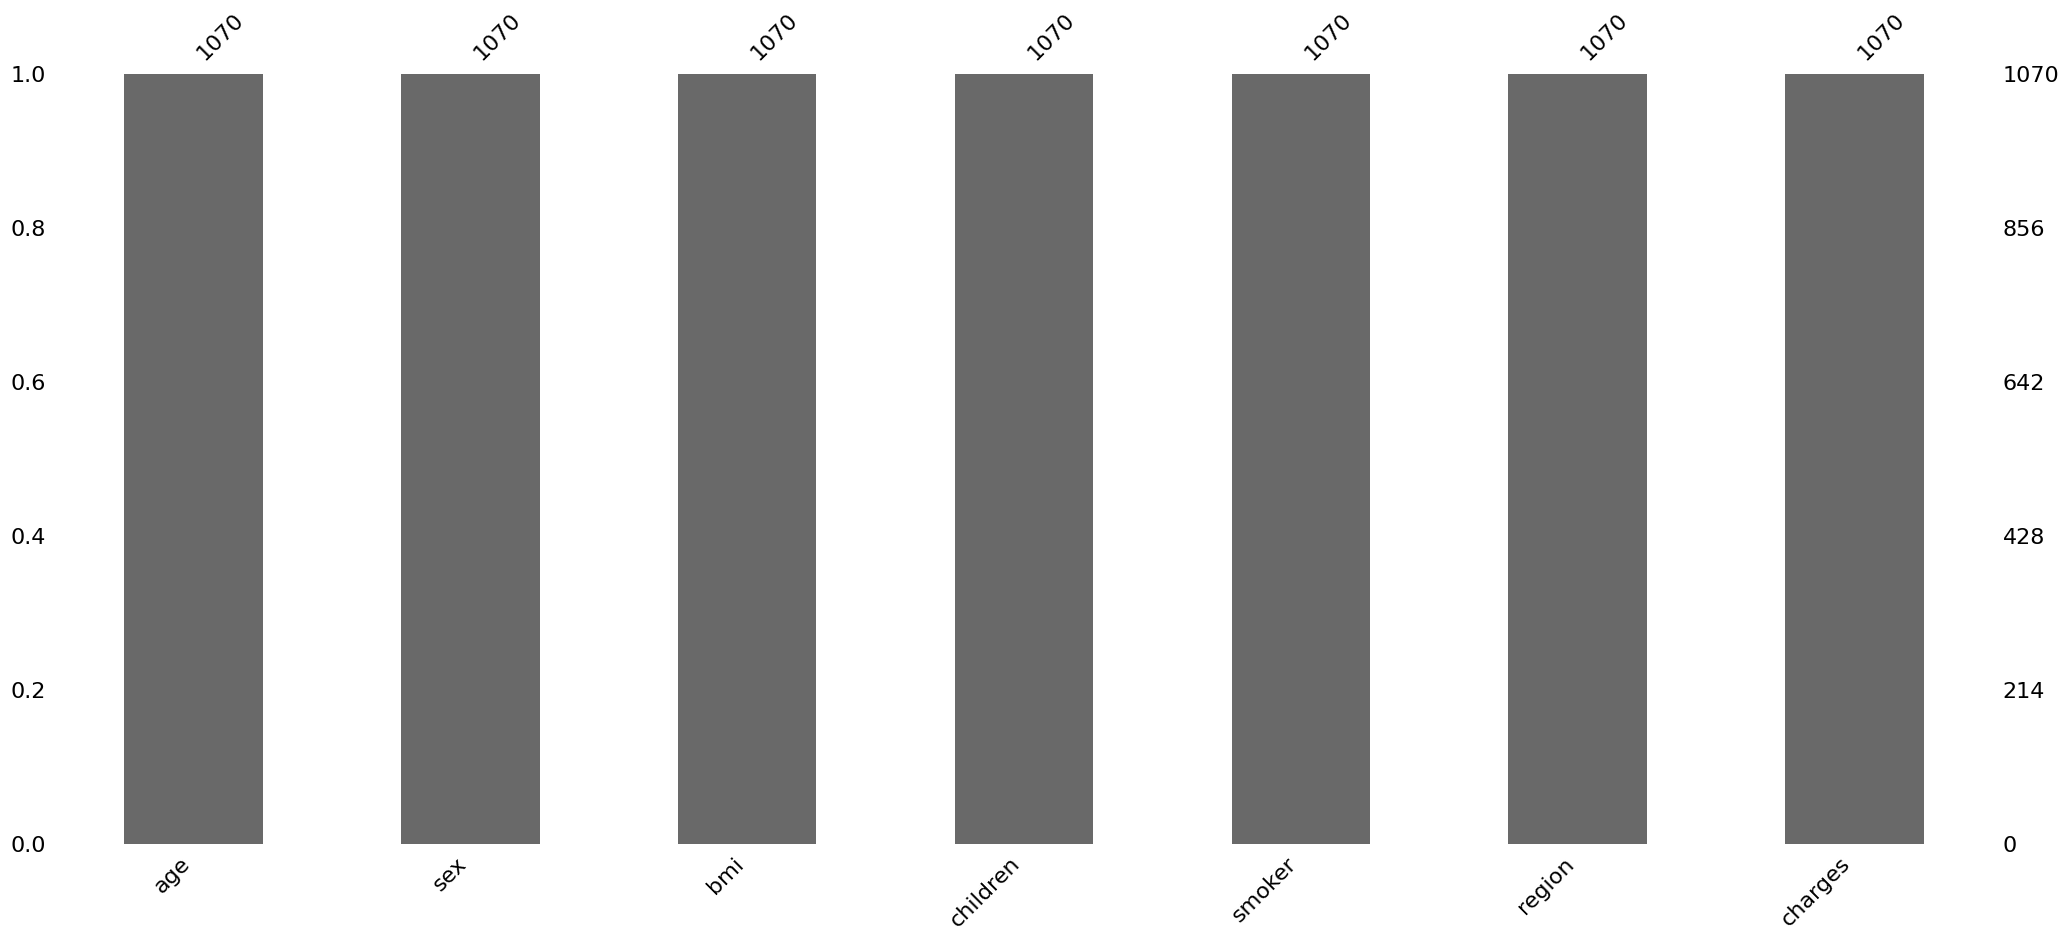

In [8]:
msno.bar(train)
plt.show()

In [9]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [12]:
# --- Preprocess Categorical Variables for numerical representation ---
# For Spearman's, we still need numerical values.
# Binary categorical variables can be mapped to 0/1.
# Multi-category nominal variables are best handled with one-hot encoding.

# Create a copy to avoid modifying the original DataFrame directly
df_processed = train.copy()

# Map 'sex' to numerical (e.g., female=0, male=1)
# Assuming 'female' and 'male' are the only values.
# If 'sex' was purely 'female' in the sample, this mapping might not show variance.
# For demonstration, we'll include it.
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})

# Map 'smoker' to numerical (no=0, yes=1)
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode 'region' as it's a nominal categorical variable with multiple categories
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

# --- Calculate the Spearman Correlation Matrix ---
# Specify method='spearman'
spearman_correlation_matrix = df_processed.corr(method='spearman')

print("Spearman Correlation Matrix:")
spearman_correlation_matrix

Spearman Correlation Matrix:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.007514,0.115408,0.074915,-0.052136,0.509846,0.016374,-0.019407,0.025868
sex,-0.007514,1.000000,0.013138,0.015945,0.070908,0.010859,0.017047,-0.008217,-0.013911
bmi,0.115408,0.013138,1.000000,0.001815,-0.000910,0.126142,-0.103393,0.227545,0.016553
children,0.074915,0.015945,0.001815,1.000000,0.023610,0.133833,0.044798,-0.023379,-0.009604
smoker,-0.052136,0.070908,-0.000910,0.023610,1.000000,0.661788,-0.030547,0.051450,-0.033688
charges,0.509846,0.010859,0.126142,0.133833,0.661788,1.000000,-0.009979,0.013010,-0.041507
region_northwest,0.016374,0.017047,-0.103393,0.044798,-0.030547,-0.009979,1.000000,-0.336290,-0.320954
region_southeast,-0.019407,-0.008217,0.227545,-0.023379,0.051450,0.013010,-0.336290,1.000000,-0.343194
region_southwest,0.025868,-0.013911,0.016553,-0.009604,-0.033688,-0.041507,-0.320954,-0.343194,1.000000


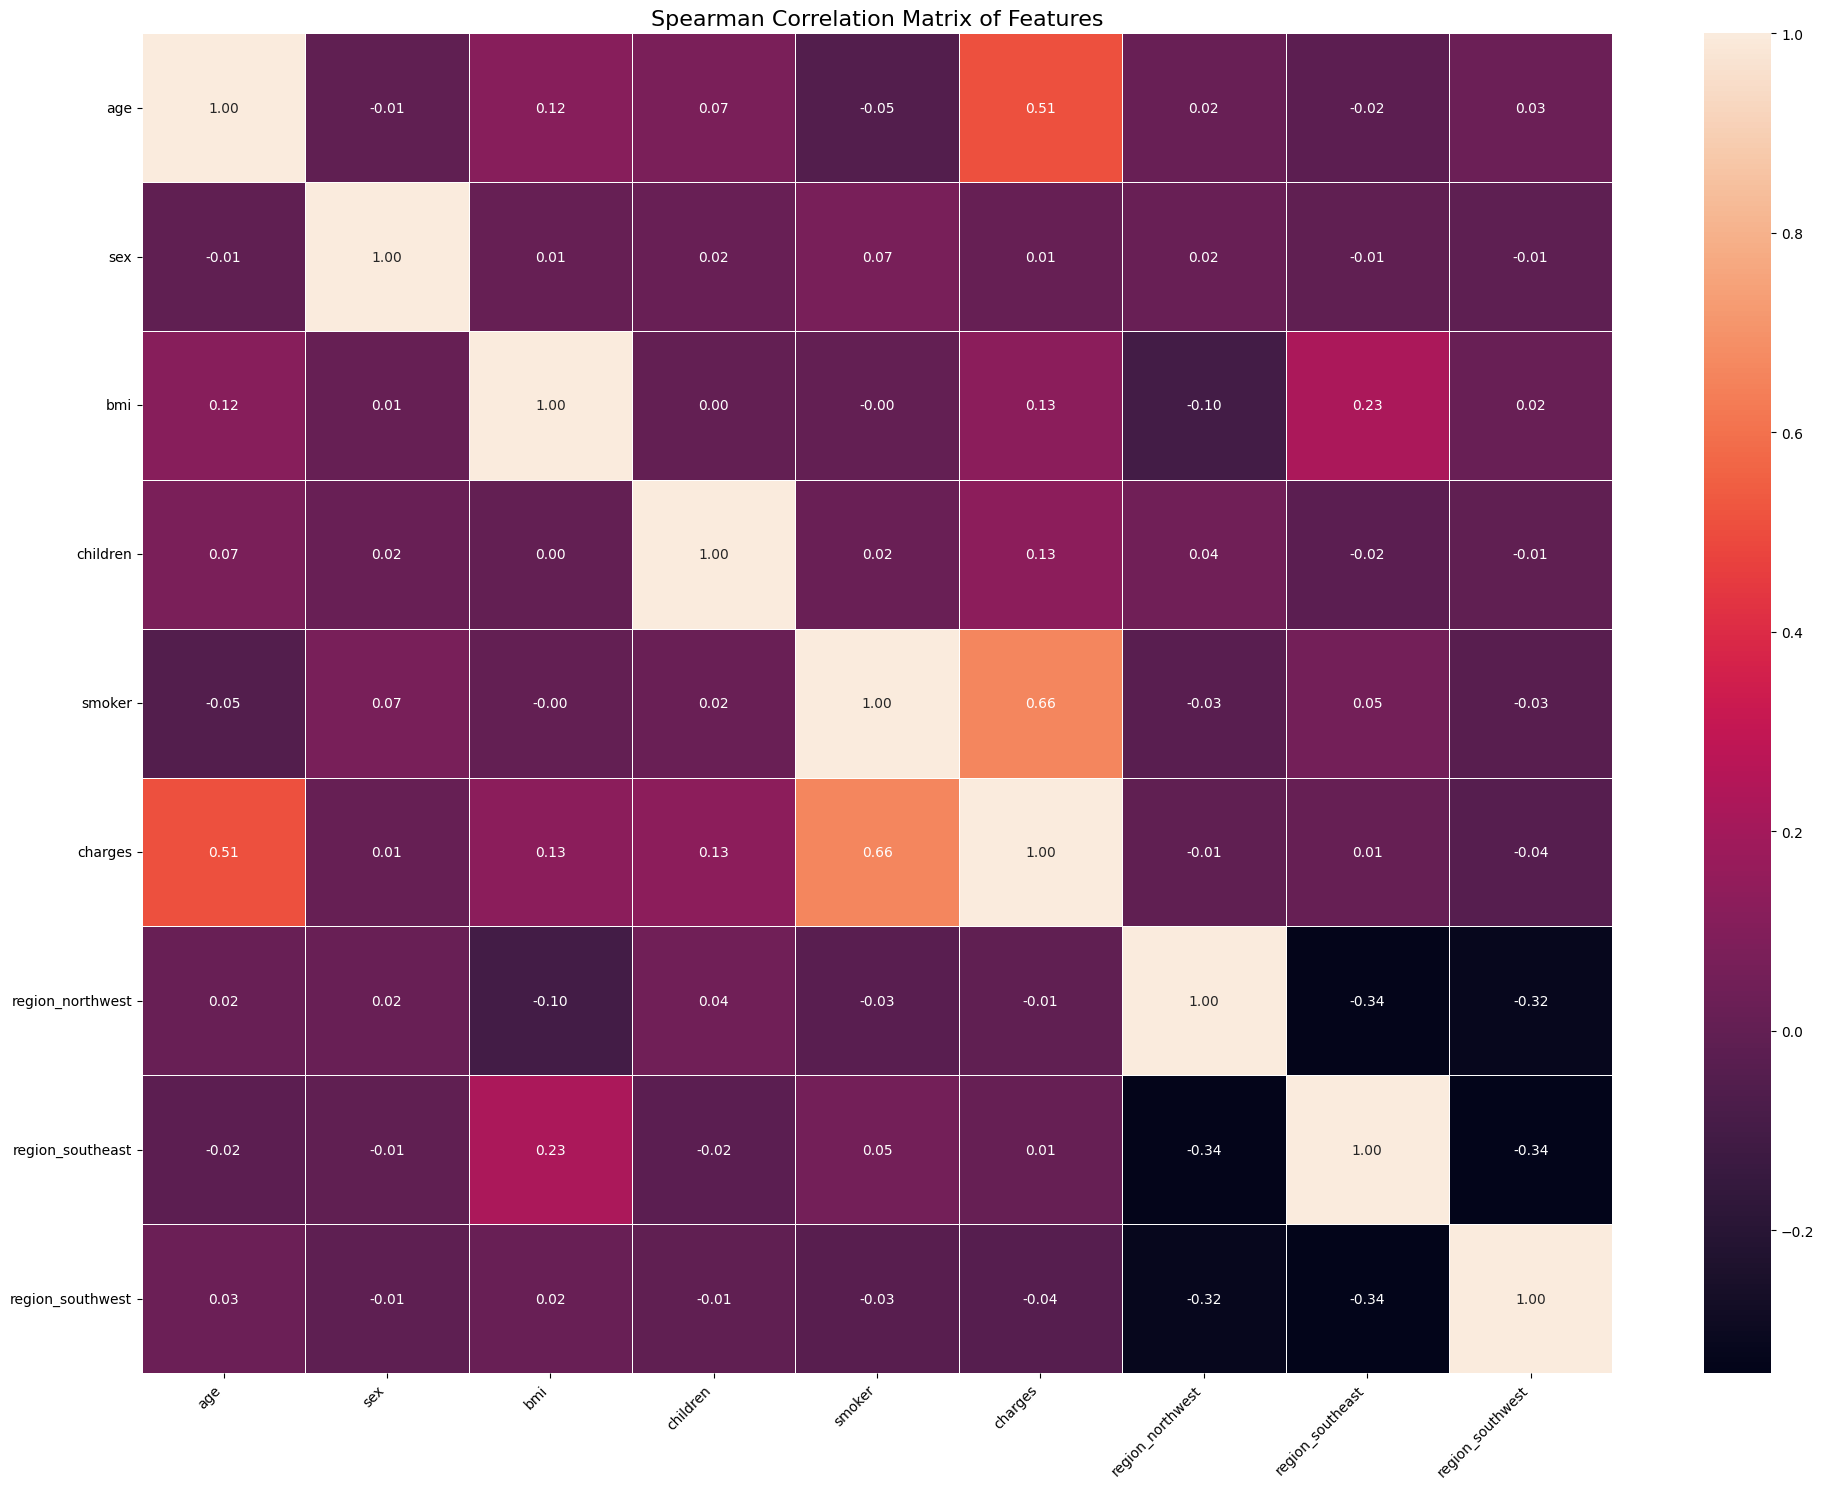


--- Interpretation of Spearman's Correlation ---
• Spearman's correlation coefficient ranges from -1 to 1.
• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).
• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).
• A value of 0 indicates no monotonic relationship.
• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.


In [13]:
# --- Visualize the Spearman Correlation Matrix using a Heatmap ---
plt.figure(figsize=(20, 15)) # Set the figure size for better readability
sns.heatmap(
    spearman_correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='rocket',  # Colormap (e.g., 'viridis', 'plasma', 'magma', 'coolwarm')
    fmt=".2f",       # Format annotations to two decimal places
    linewidths=.5    # Add lines between cells
)
plt.title('Spearman Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Interpretation of Spearman's Correlation ---")
print("• Spearman's correlation coefficient ranges from -1 to 1.")
print("• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).")
print("• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).")
print("• A value of 0 indicates no monotonic relationship.")
print("• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.")


--- Distribution Plot of Charges ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


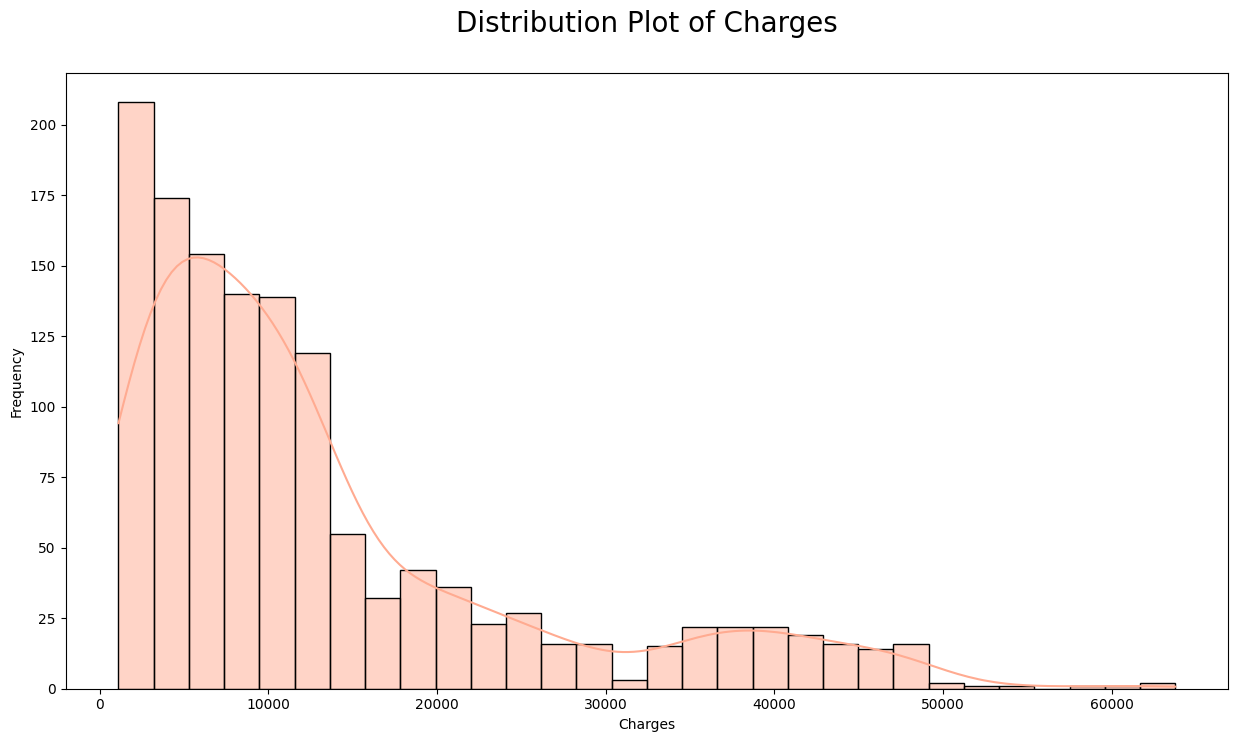

In [14]:
# --- Distribution plot of charges column ---
print("\n--- Distribution Plot of Charges ---")
plt.figure(figsize = (15, 8))
sns.histplot(df['charges'], kde=True, color='#FFAB91') # Using histplot with kde=True for distribution
plt.title('Distribution Plot of Charges\n', fontsize = 20)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


--- Distribution Plot of Charges (Seaborn) ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

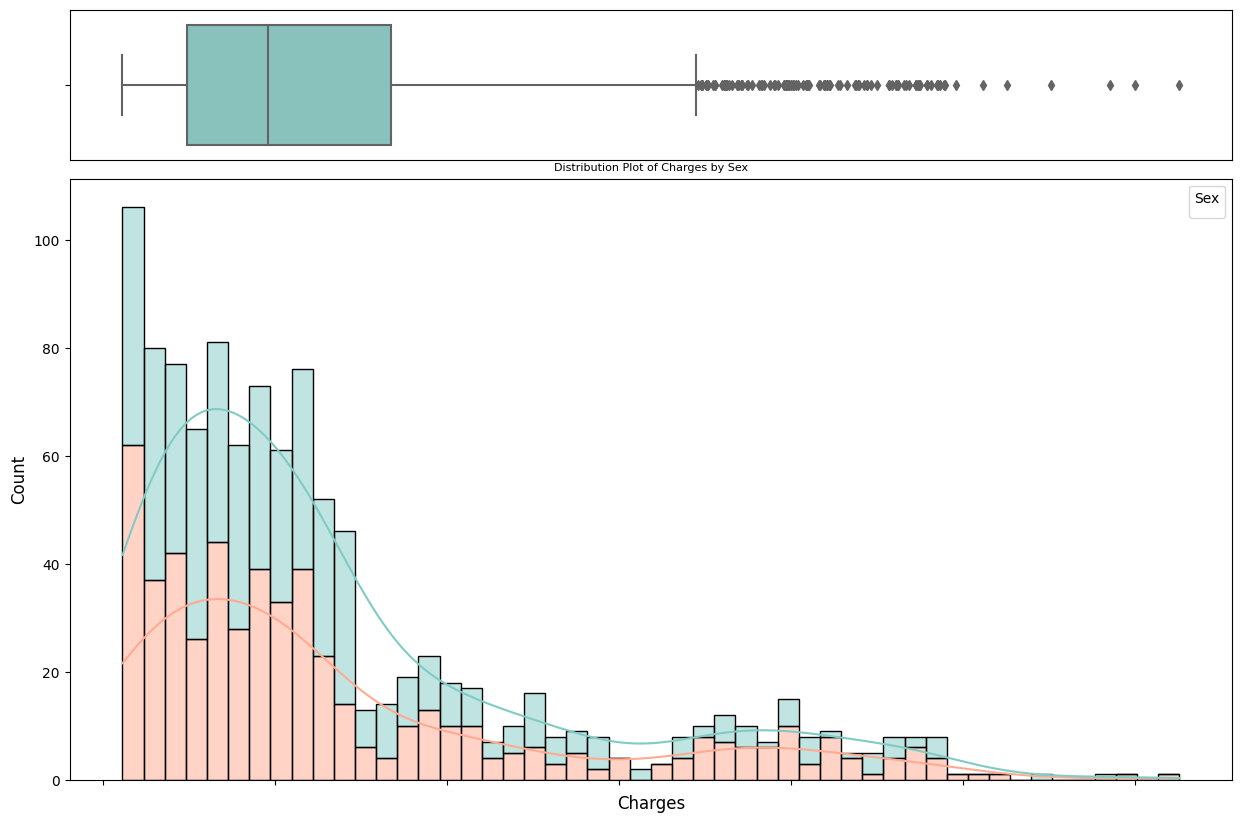

In [15]:
# --- Distribution plot of charges column using Seaborn (replacing Plotly Express) ---
print("\n--- Distribution Plot of Charges (Seaborn) ---")

# Create a figure and a set of subplots using gridspec for a combined plot
fig = plt.figure(figsize=(15, 10)) # Adjusted figure size for better layout as per user's request
gs = fig.add_gridspec(2, 1, height_ratios=[0.2, 0.8], hspace=0.05) # 2 rows, 1 column, top row smaller

ax_box = fig.add_subplot(gs[0, 0]) # Top subplot for box plot
ax_hist = fig.add_subplot(gs[1, 0], sharex=ax_box) # Bottom subplot for histogram, sharing x-axis

# Define a custom palette with the specified hex color codes (light teal/mint and salmon/peach)
custom_palette = ["#80CBC4", "#FFAB91"] # These hex codes approximate the colors in your provided images

# Plot marginal box plot, colored by 'sex'
sns.boxplot(data=train, x='charges', hue='sex', ax=ax_box, palette=custom_palette)
ax_box.set(xlabel='', xticklabels=[]) # Remove x-axis label and ticks for the box plot
ax_box.tick_params(axis='x', bottom=False) # Remove bottom ticks

# Plot histogram, colored by 'sex' and stacked
sns.histplot(data=train, x='charges', hue='sex', multiple='stack', kde=True, bins=50, ax=ax_hist, palette=custom_palette)
ax_hist.set_title('Distribution Plot of Charges by Sex', fontsize=8) # Title font size updated to 16 for visibility
ax_hist.set_xlabel('Charges', fontsize=12)
ax_hist.set_ylabel('Count', fontsize=12)
ax_hist.legend(title='Sex') # The legend clearly labels the 'sex' categories

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [16]:
train['smoker'].unique()

array(['no', 'yes'], dtype=object)

# Freature Engineer

## Drop noise features

In [17]:
train = train.drop(columns=['sex', 'region'], errors='ignore')
test = test.drop(columns=['sex', 'region'], errors='ignore')
train.head()

,age,bmi,children,smoker,charges
560,46,19.95,2,no,9193.83850
1285,47,24.32,0,no,8534.67180
1142,52,24.86,0,no,27117.99378
969,39,34.32,5,no,8596.82780
486,54,21.47,3,no,12475.35130


## Encode categorical features and data normalization for nummerical features

In [18]:
# --- Initialize the OneHotEncoder ---
# handle_unknown='ignore' will set unseen categories to all zeros, preventing errors.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False returns a dense array

# --- Fit the encoder on the 'smoker' column of the TRAINING data only ---
# We fit on train_df[['smoker']] (note the double brackets to keep it as a DataFrame)
encoder.fit(train[['smoker']])

# --- Transform the 'smoker' column in both TRAINING and TEST datasets ---

# Transform training data
smoker_encoded_train = encoder.transform(train[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
# encoder.get_feature_names_out() provides names like 'smoker_no', 'smoker_yes'
smoker_df_train = pd.DataFrame(smoker_encoded_train, columns=encoder.get_feature_names_out(['smoker']), index=train.index)

# Transform test data
smoker_encoded_test = encoder.transform(test[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
smoker_df_test = pd.DataFrame(smoker_encoded_test, columns=encoder.get_feature_names_out(['smoker']), index=test.index)

# --- Drop the original 'smoker' column and concatenate the new encoded columns ---

# For training data
train = train.drop('smoker', axis=1)
train = pd.concat([train, smoker_df_train], axis=1)

# For test data
test = test.drop('smoker', axis=1)
test = pd.concat([test, smoker_df_test], axis=1)

# --- Standard Scale numerical columns ---
# Identify numerical columns (excluding the newly created smoker_no/smoker_yes and the target 'charges')
numerical_cols = ['age', 'bmi', 'children','charges'] # Assuming these are your numerical features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the TRAINING data only
scaler.fit(train[numerical_cols])

# Define y_scaler if not already defined
y_scaler = StandardScaler()
y_scaler.fit(train[['charges']])  # Fit only on the charges column
train['charges'] = y_scaler.transform(train[['charges']])
test['charges'] = y_scaler.transform(test[['charges']])
# Transform numerical columns in both TRAINING and TEST datasets
train[numerical_cols] = scaler.transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
train

,age,bmi,children,charges,smoker_no,smoker_yes
560,0.472227,-1.756525,0.734336,-1.110917,1.0,0.0
1285,0.543313,-1.033082,-0.911192,-1.110921,1.0,0.0
1142,0.898745,-0.943687,-0.911192,-1.110793,1.0,0.0
969,-0.025379,0.622393,3.202629,-1.110921,1.0,0.0
486,1.040918,-1.504893,1.557100,-1.110894,1.0,0.0
...,...,...,...,...,...,...
1095,-1.518194,0.130717,2.379865,-1.110949,1.0,0.0
1130,-0.025379,-1.107579,3.202629,-1.110921,1.0,0.0
1294,1.325264,-0.891539,-0.911192,-1.110898,1.0,0.0
860,-0.167551,2.820864,0.734336,-1.110661,0.0,1.0


## Split features and target label

In [19]:
x_train = train.drop('charges', axis=1) 
y_train = train['charges'] 
x_test = test.drop('charges', axis=1) 
y_test = test['charges'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 5)
y_train shape: (1070,)
X_test shape: (268, 5)
y_test shape: (268,)


## Dimensionality Reduction

In [20]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Visualize dimensionality reduction

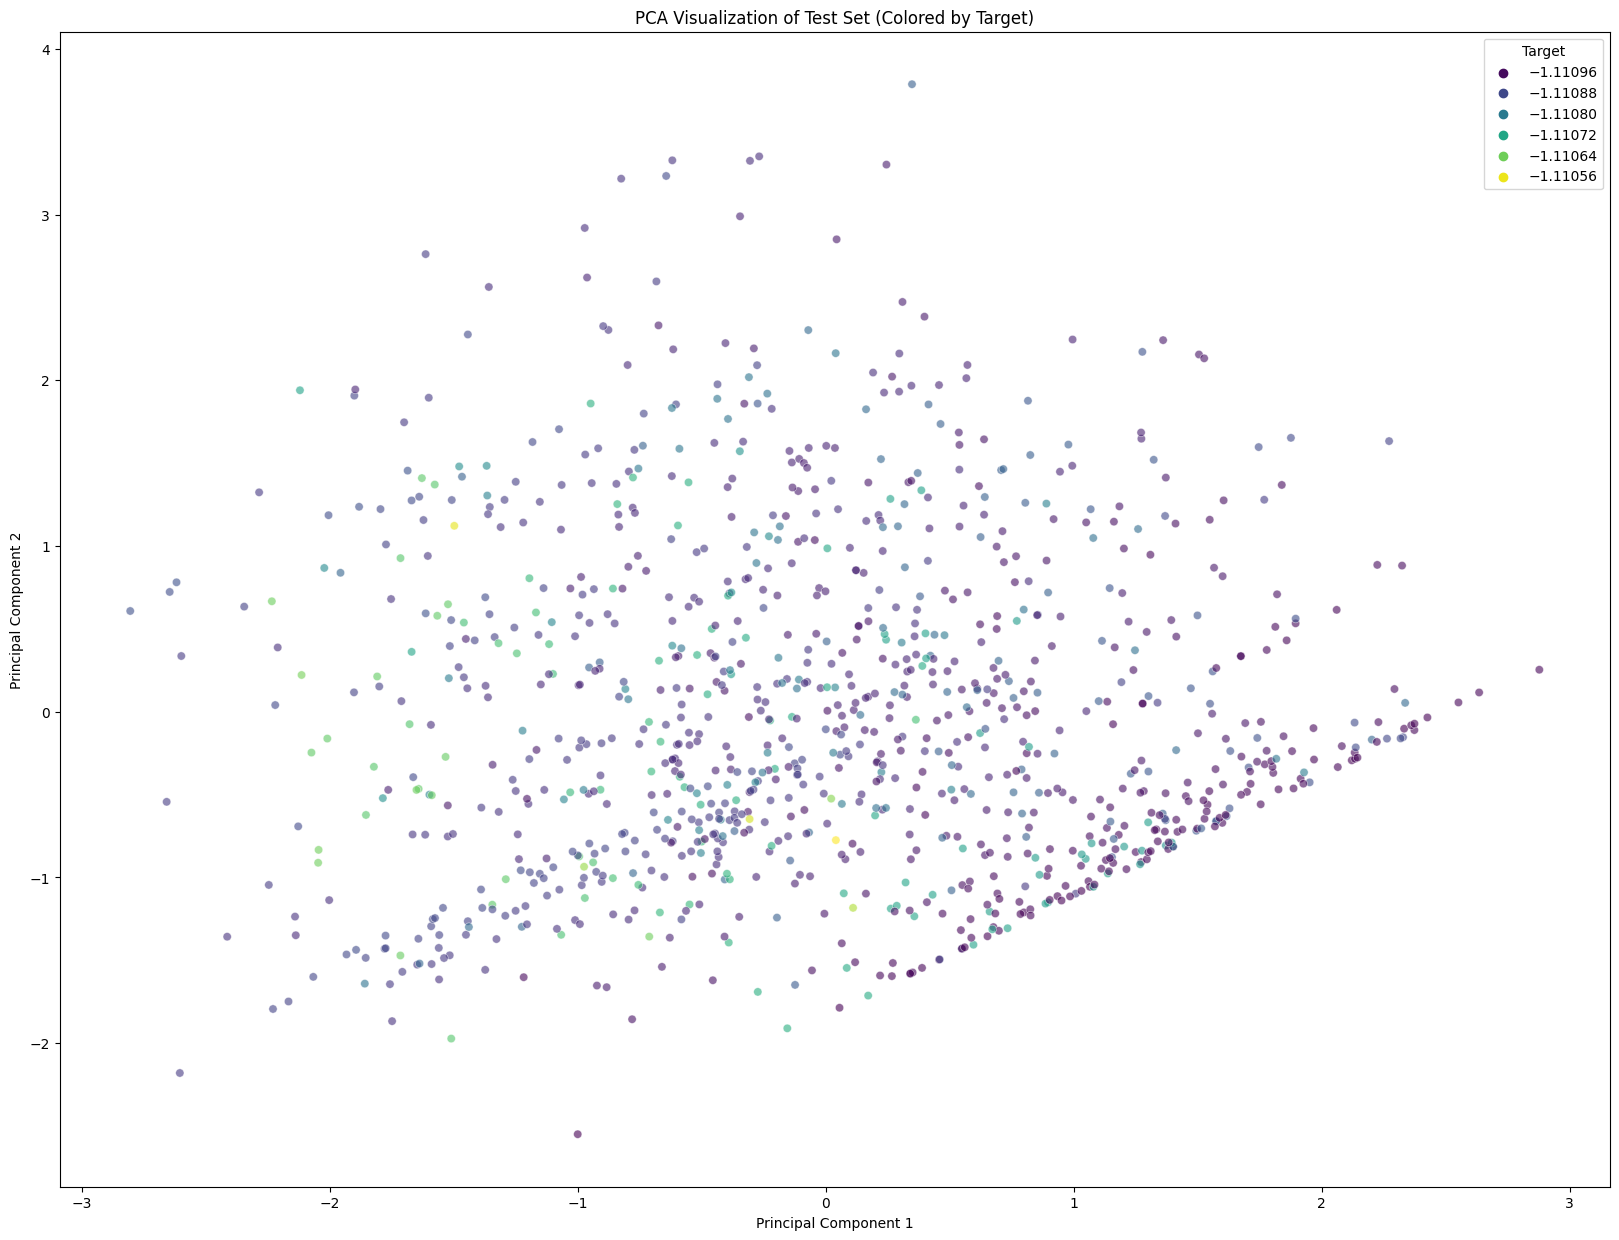

In [21]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

# Modeling

## Model Architecture, model building (PyTorch), and model training

In [22]:
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) # .values to get numpy array from Series

# Split data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Lists to store history for plotting (only loss for regression)
train_loss_history = []
val_loss_history = []
# train_accuracy_history = [] # Not applicable for regression
# val_accuracy_history = [] # Not applicable for regression

# --- Define the Perceptron Model using PyTorch's nn.Module (for Regression) ---
class PerceptronModel(nn.Module):
    """
    A simple Perceptron model implemented using PyTorch's nn.Module for REGRESSION.
    It consists of a single linear layer without a final activation function
    (like sigmoid), as the output should be continuous.
    """
    def __init__(self, input_dim):
        """
        Initializes the PerceptronModel.

        Args:
            input_dim (int): The number of input features for the model.
        """
        super(PerceptronModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        # For regression, we typically do NOT use a sigmoid or other activation
        # on the final output layer, as we want a continuous output.
        # self.sigmoid = nn.Sigmoid() # REMOVED FOR REGRESSION

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): The input tensor to the model.

        Returns:
            torch.Tensor: The output tensor after applying the linear transformation.
        """
        x = self.linear(x)
        # x = self.sigmoid(x) # REMOVED FOR REGRESSION
        return x

# Instantiate the model
input_dim = x_train.shape[1] # Get the number of features from your training data (should be 2 after PCA)
model = PerceptronModel(input_dim)

# Print a summary of the model architecture
print("\n--- Model Architecture ---")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")

# --- Define Loss Function and Optimizer (for Regression) ---
# For regression, use Mean Squared Error (MSELoss) or Mean Absolute Error (L1Loss)
criterion = nn.MSELoss() # Changed from BCELoss to MSELoss for regression

# Use the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --- Implement Early Stopping ---
early_stopping_patience = 5
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None


# --- Train the Model ---
epochs = 200
print("\n--- Training Model ---")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_split)
    loss = criterion(outputs, y_train_split)
    loss.backward()
    optimizer.step()

    # --- Validation step ---
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val_split)
        val_loss = criterion(val_outputs, y_val_split)

        # Accuracy is not applicable for regression, remove these lines
        # train_preds_for_acc = (outputs > 0.5).float()
        # train_accuracy = (train_preds_for_acc == y_train_split).float().mean()
        # val_preds = (val_outputs > 0.5).float()
        # val_accuracy = (val_preds == y_val_split).float().mean()

    # Store metrics for plotting (only loss)
    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())
    # train_accuracy_history.append(train_accuracy.item()) # Not applicable
    # val_accuracy_history.append(val_accuracy.item()) # Not applicable

    # Print training and validation progress for the current epoch
    # Removed accuracy from print statement
    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {loss.item():.4f}, "
          f"Validation Loss: {val_loss.item():.4f}")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1}. Restoring best weights.")
            model.load_state_dict(best_model_state)
            break

print("\nTraining complete.")


--- Model Architecture ---
PerceptronModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Number of trainable parameters: 3

--- Training Model ---
Epoch 1/200, Train Loss: 0.7911, Validation Loss: 0.7247
Epoch 2/200, Train Loss: 0.7619, Validation Loss: 0.6984
Epoch 3/200, Train Loss: 0.7334, Validation Loss: 0.6727
Epoch 4/200, Train Loss: 0.7055, Validation Loss: 0.6476
Epoch 5/200, Train Loss: 0.6784, Validation Loss: 0.6231
Epoch 6/200, Train Loss: 0.6519, Validation Loss: 0.5993
Epoch 7/200, Train Loss: 0.6261, Validation Loss: 0.5760
Epoch 8/200, Train Loss: 0.6011, Validation Loss: 0.5534
Epoch 9/200, Train Loss: 0.5767, Validation Loss: 0.5315
Epoch 10/200, Train Loss: 0.5530, Validation Loss: 0.5102
Epoch 11/200, Train Loss: 0.5301, Validation Loss: 0.4895
Epoch 12/200, Train Loss: 0.5079, Validation Loss: 0.4694
Epoch 13/200, Train Loss: 0.4863, Validation Loss: 0.4500
Epoch 14/200, Train Loss: 0.4656, Validation Loss: 0.4313
Epoch 15/200, Train Loss: 0.445

## Visualize model training

Final Training Loss (evaluated on full x_train): 0.0000

Learned Weights: [-4.1641149e-05 -1.7427092e-05]
Learned Bias: -1.1110

Sample Predictions (from training data):
  Input: [0.53855383 1.46074963], Actual: -1.1109, Predicted: -1.1111
  Input: [ 0.53413204 -0.33157221], Actual: -1.1110, Predicted: -1.1110
  Input: [ 0.224176   -0.36447181], Actual: -1.1109, Predicted: -1.1110
  Input: [-1.35867453  2.56288817], Actual: -1.1108, Predicted: -1.1110
  Input: [-0.27689398  2.09084127], Actual: -1.1110, Predicted: -1.1110
  Input: [-2.06651493 -1.59967059], Actual: -1.1110, Predicted: -1.1109
  Input: [ 1.80434077 -0.36914634], Actual: -1.1109, Predicted: -1.1111
  Input: [ 2.3277307  -0.15381344], Actual: -1.1109, Predicted: -1.1111
  Input: [-1.12589182 -0.8853367 ], Actual: -1.1109, Predicted: -1.1110
  Input: [-0.20518225 -0.34459728], Actual: -1.1108, Predicted: -1.1110


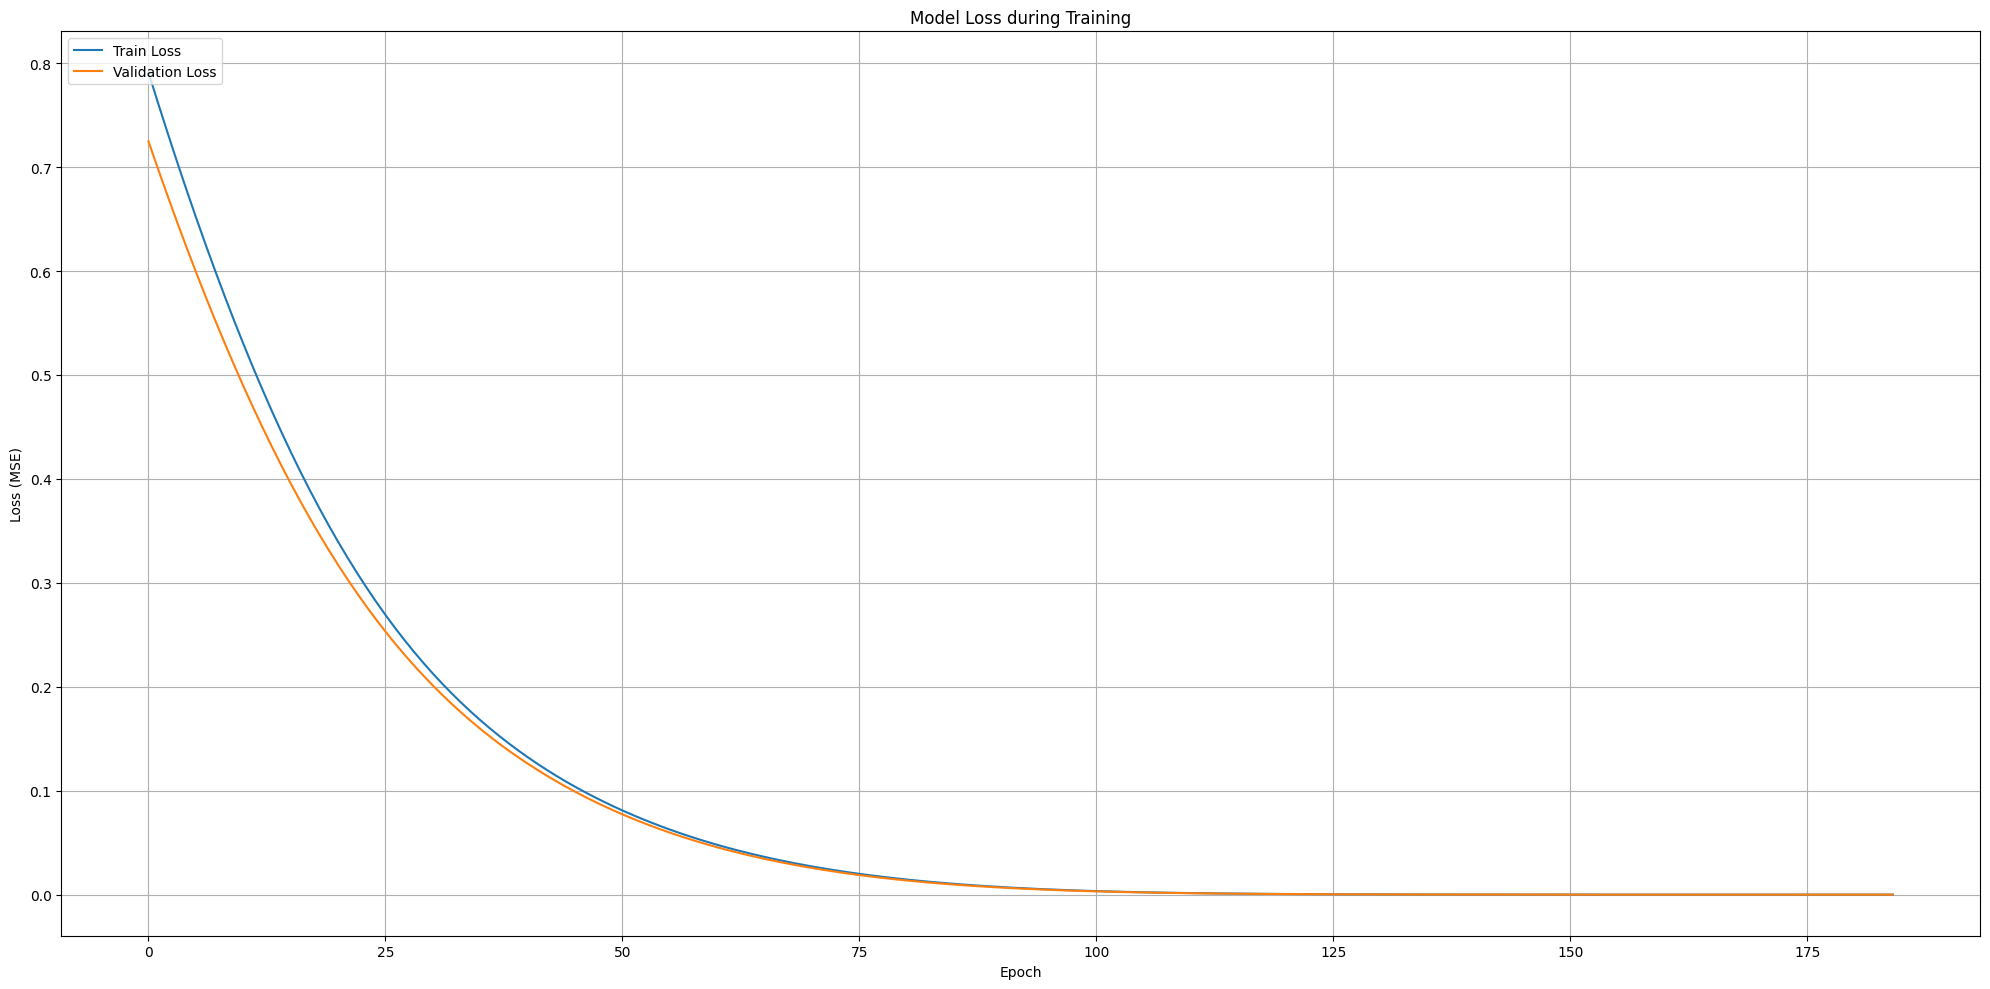

In [23]:
# Set the model back to evaluation mode
model.eval()
with torch.no_grad():
    outputs_train_eval = model(x_train_tensor)
    loss_train_eval = criterion(outputs_train_eval, y_train_tensor)
    # predictions_train_eval = (outputs_train_eval > 0.5).float() # Not applicable
    # accuracy_train_eval = (predictions_train_eval == y_train_tensor).float().mean() # Not applicable

print(f"Final Training Loss (evaluated on full x_train): {loss_train_eval.item():.4f}")
# print(f"Final Training Accuracy (evaluated on full x_train): {accuracy_train_eval.item():.4f}") # Not applicable

# --- Make Predictions ---
weights = model.linear.weight.data.cpu().numpy()
bias = model.linear.bias.data.cpu().numpy()
print(f"\nLearned Weights: {weights.flatten()}")
print(f"Learned Bias: {bias[0]:.4f}")

model.eval()
with torch.no_grad():
    y_pred_output_tensor = model(x_train_tensor) # Output is now continuous
y_pred_output = y_pred_output_tensor.cpu().numpy().flatten() # Convert to numpy and flatten
# y_pred = (y_pred_proba > 0.5).astype(int) # Not applicable for regression

print("\nSample Predictions (from training data):")
for i in range(min(10, len(x_train))):
    # For regression, compare actual target with predicted continuous value
    print(f"  Input: {x_train[i]}, Actual: {y_train[i]:.4f}, Predicted: {y_pred_output[i]:.4f}")

# --- Visualize the Loss during Training ---
plt.figure(figsize=(20, 10)) # Single plot for loss

plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss (MSE)') # Updated label for MSE
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


## Visualize the Regression Prediction Surface


--- Visualizing Regression Prediction Surface ---


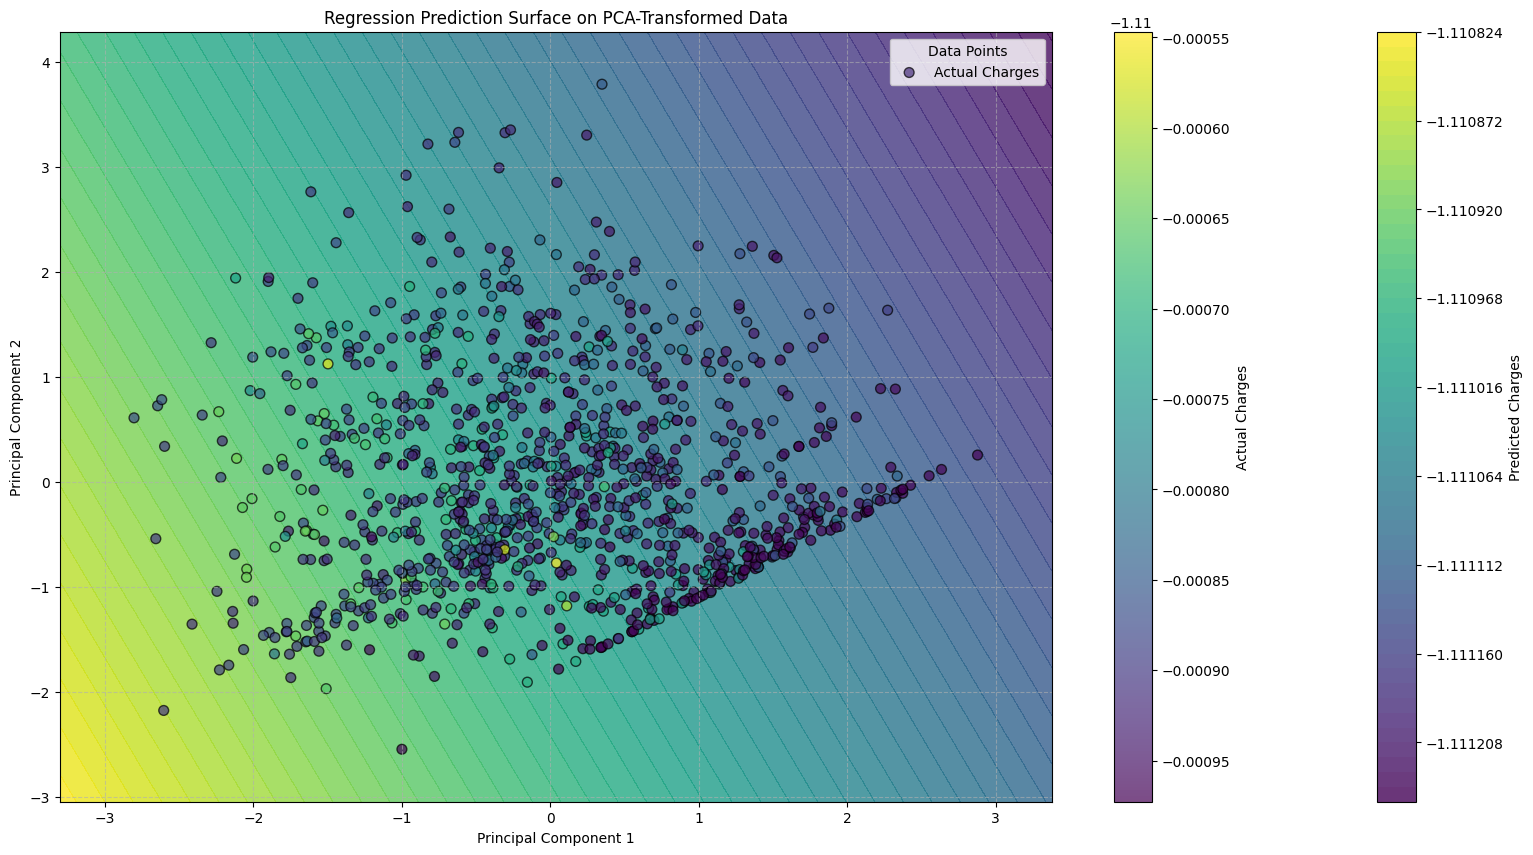

In [24]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Visualize the Regression Prediction Surface (3D)


--- Visualizing Regression Prediction Surface (3D) ---


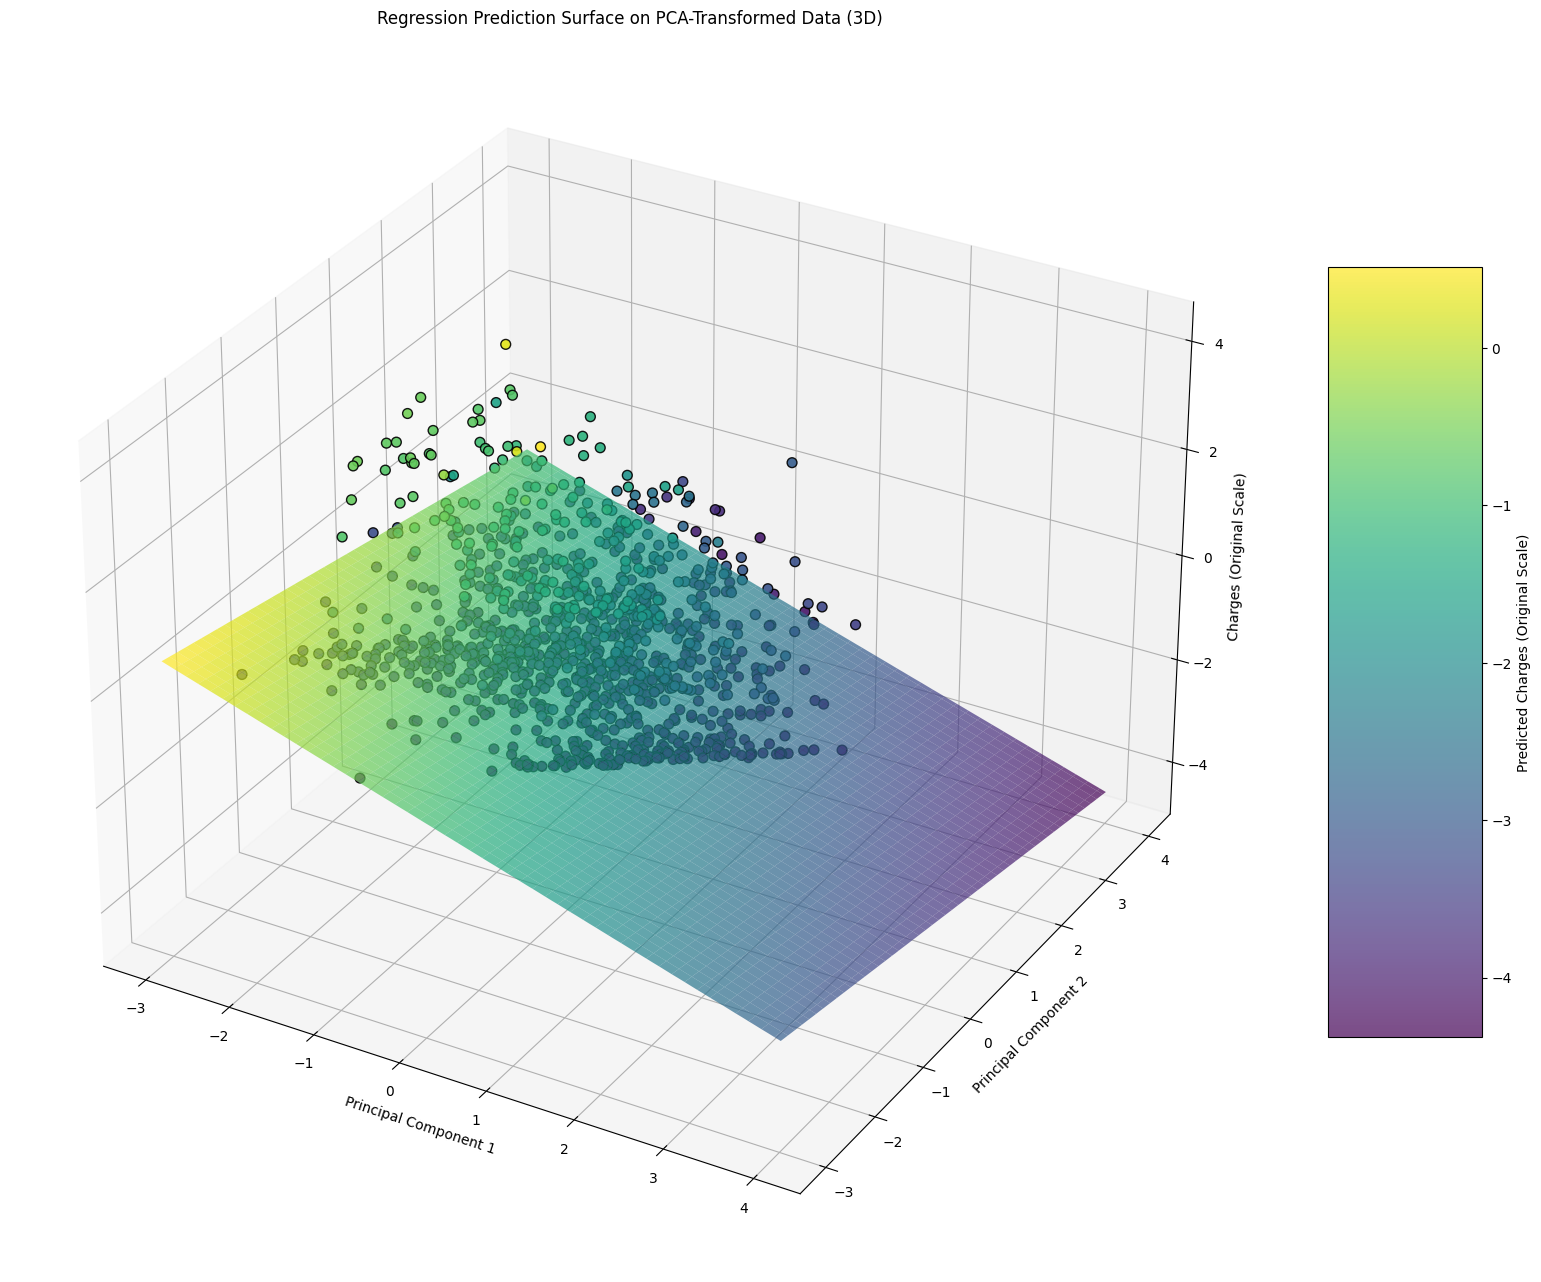

In [25]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space with range matching the reference image (-3 to 4)
x_min, x_max = -3.0, 4.0  # Adjusted to match the reference image range
y_min, y_max = -3.0, 4.0  # Adjusted to match the reference image range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted_scaled = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)
# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual training data points, colored by their true charges (original scale)
y_train_original_scale = y_scaler.inverse_transform(y_train_tensor.cpu().numpy().reshape(-1, 1)).flatten()
ax.scatter(x_train[:, 0], x_train[:, 1], y_train_original_scale, c=y_train_original_scale, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D)")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()

# Model Evaluation

In [26]:
# --- Metrics Calculation for Regression ---
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_test_output_tensor = model(x_test_tensor)
y_pred_test_output_scaled = y_pred_test_output_tensor.cpu().numpy().flatten()
# Inverse transform the scaled predictions back to original scale
y_pred_test_output = y_scaler.inverse_transform(y_pred_test_output_scaled.reshape(-1, 1)).flatten()

# Use the original y_test values (not y_test_raw, which is undefined here)
# Assuming y_test is the scaled target, inverse transform it as well for comparison
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, y_pred_test_output)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_test_output)

print(f"\n--- Regression Metrics on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print("-" * 30)


--- Regression Metrics on Test Data ---
Mean Squared Error (MSE): 3.2671
Root Mean Squared Error (RMSE): 1.8075
R-squared (R2): -2.0374
------------------------------


## Visualize the Regression Prediction Surface on test dataset


--- Visualizing Regression Prediction Surface ---


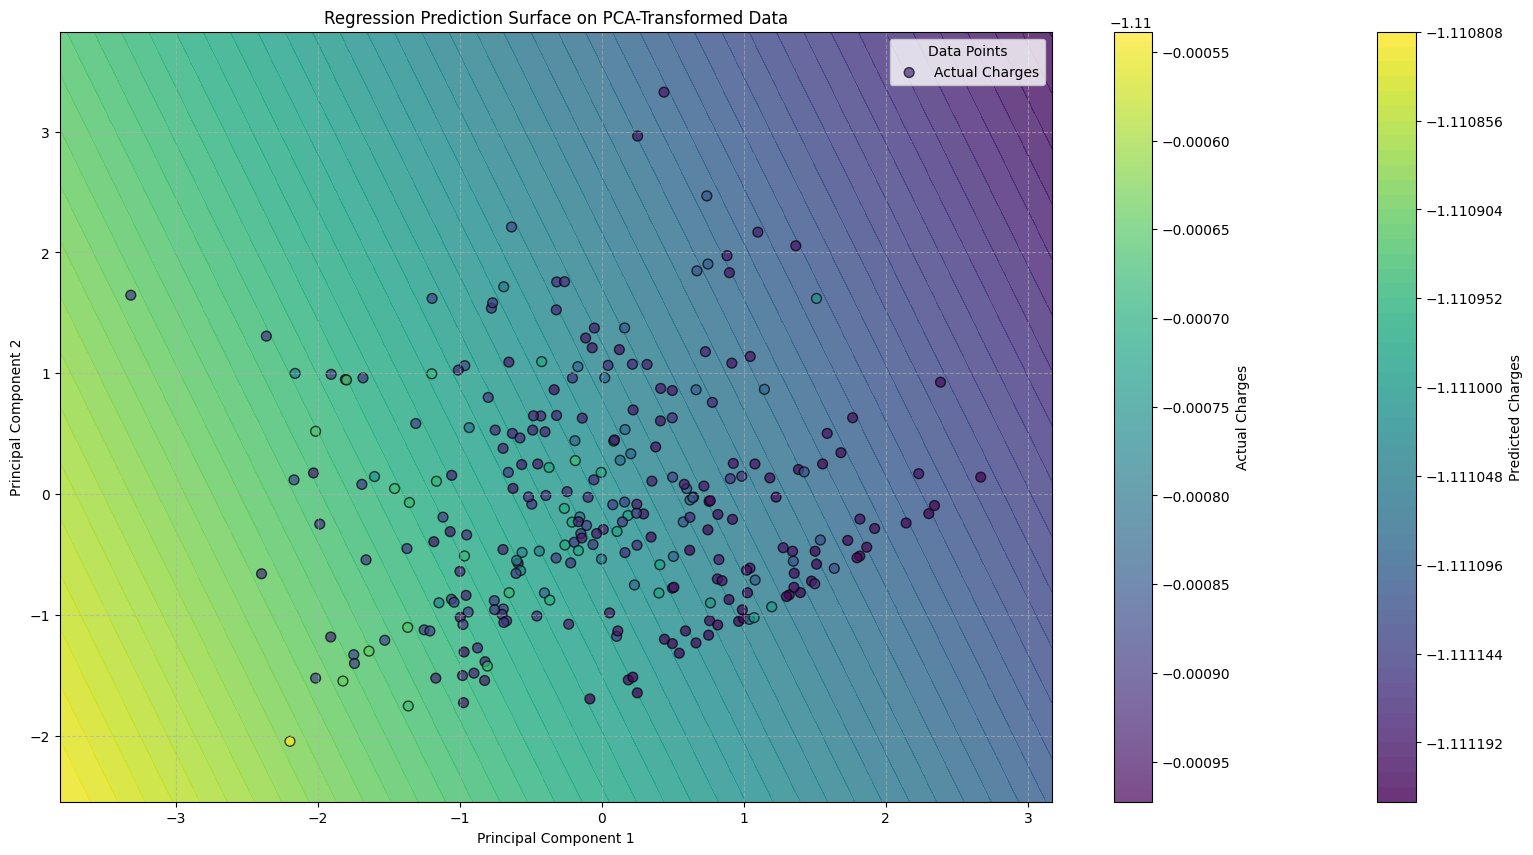

In [27]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges
scatter = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Visualize the Regression Prediction Surface (3D)


--- Visualizing Regression Prediction Surface (3D) ---


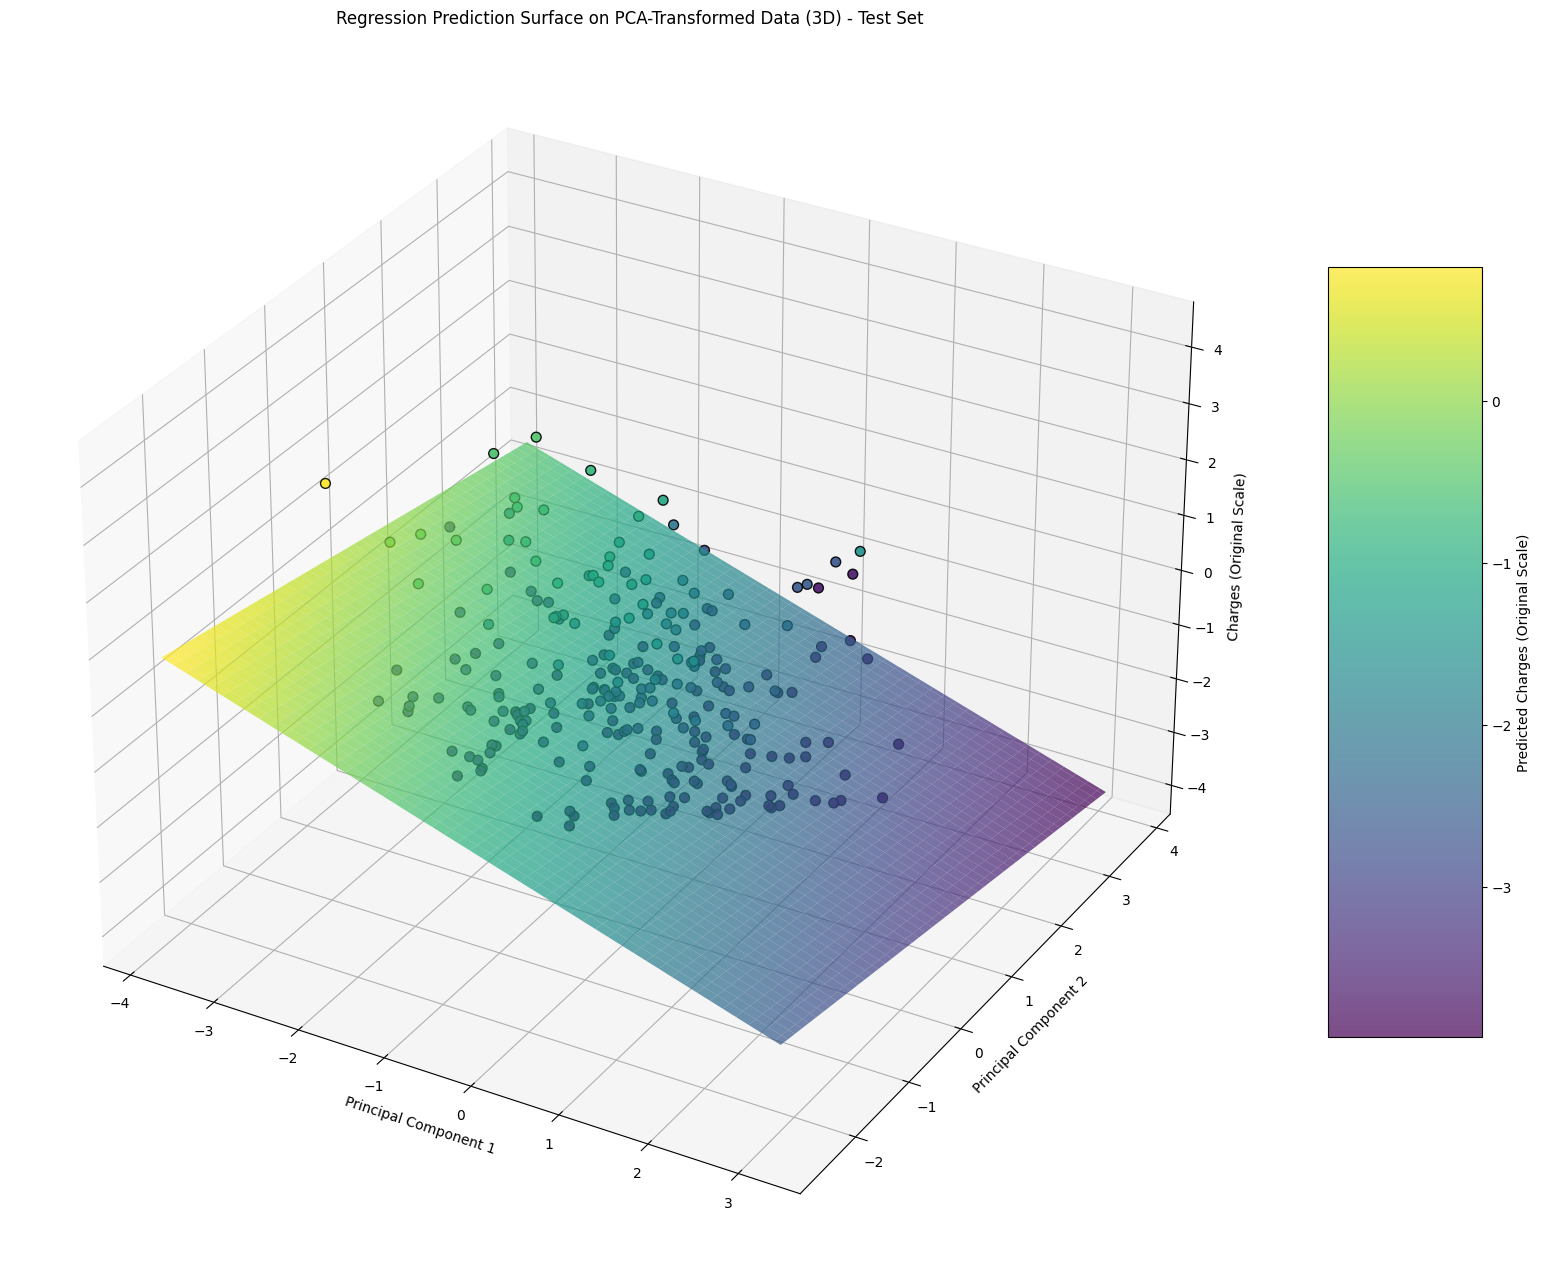

In [28]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space based on x_test
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted_scaled = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)
# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual test data points, colored by their true charges (original scale)
# Ensure y_test_tensor is defined (e.g., y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1))
ax.scatter(x_test[:, 0], x_test[:, 1], y_test_original, c=y_test_original, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D) - Test Set")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()